#!pip install requests
import requests 
import pandas as pd

Data collected and saved successfully.
  100 Best Netflix Series To Watch Right Now (April 2024) | Rotten Tomatoes
(0, 2)
                   Movie Name Rating %
0           The Dragon Prince     100%
1                          Mo     100%
2   Arcane: League of Legends     100%
3            Blue Eye Samurai     100%
4               Blood of Zeus     100%
..                        ...      ...
95           The Walking Dead      79%
96   Colin in Black and White      79%
97                 Inside Job      79%
98                       1899      77%
99                  Wednesday      73%

[100 rows x 2 columns]
Wednesday 73%
                   Movie Name Rating %
0           The Dragon Prince     100%
1                          Mo     100%
2   Arcane: League of Legends     100%
3            Blue Eye Samurai     100%
4               Blood of Zeus     100%
..                        ...      ...
95           The Walking Dead      79%
96   Colin in Black and White      79%
97                 In

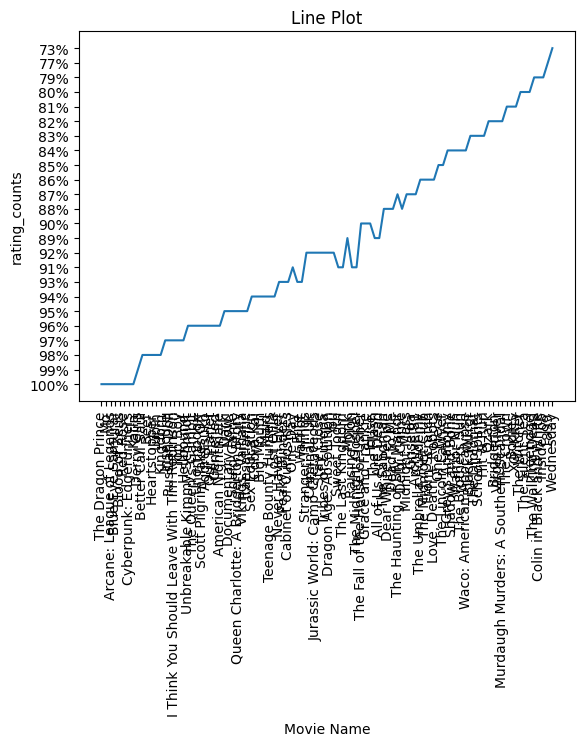

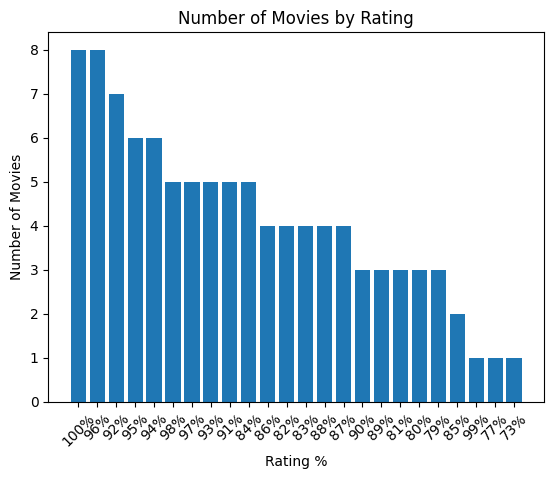

In [84]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as mtp


def read_from_webhtml_into_csv():
   #open web page to scrap data in read mode
   with open ("moviestop250/moviemeter.html", "r",encoding="utf-8") as f:
      html_doc=f.read()
      #define a beautifulsoup parser
      soup = BeautifulSoup(html_doc,'html.parser')
      print(soup.title.string)
            #define two strings from div class
      str=soup.find_all(class_ = 'article_movie_title')
      str2=soup.find_all(class_ = 'tMeterScore')
      df = pd.DataFrame(columns=['Movie Name','Rating %'])
      print(df.shape) # to check dataframe is created
      #fill movie name columns into dataframe
      j=0
      for i in str:
            column_moviename=i.h2.a.text
            #print(column_moviename)
            df.loc[j,"Movie Name"]=column_moviename
            j=j+1
      #fill ratings columns into dataframe
      j=0
      for i in str2:
            column_rating=i.text
            df.loc[j,"Rating %"]=column_rating
            j=j+1
      print(df)
      print(column_moviename,column_rating)
      df.to_csv('moviestop250\outputmovies.csv', index=False)


def movie_rating_analysis():
    # Read CSV file into a DataFrame
    df = pd.read_csv('moviestop250\outputmovies.csv')

    # Display the DataFrame
    print(df)

    mtp.plot(df["Movie Name"], df["Rating %"])
    rating_counts = df["Rating %"].value_counts()
    # Add labels and title
    mtp.xlabel('Movie Name')
    mtp.ylabel('rating_counts')
    mtp.title('Line Plot')
    mtp.xticks(df["Movie Name"].index, rotation=90)
    mtp.show()

    rating_counts = df["Rating %"].value_counts()

    # Plotting the bar graph
    mtp.bar(rating_counts.index, rating_counts.values)

    # Adding labels and title
    mtp.xlabel('Rating %')
    mtp.ylabel('Number of Movies')
    mtp.title('Number of Movies by Rating')
    mtp.xticks(rating_counts.index, rotation=45)
    # Display the plot
    mtp.show()
    

def main():
    url = "https://website_name_of_your_choice/guide/list_of_movies/"
    path = "moviestop250/moviemeter.html"  
    try:
        # Make the HTTP request
        a = requests.get(url)
        a.raise_for_status()  # Raise an exception for HTTP errors
        # Write the response content to the file
        with open(path, "w", encoding="utf-8") as f:
            f.write(a.text)
        print("Data collected and saved successfully.")
        read_from_webhtml_into_csv()
        movie_rating_analysis()
        
    except requests.exceptions.RequestException as e:
        print(f"Error collecting data from {url}: {e}")

if __name__ == "__main__":
    main()

#!pip install BeautifulSoup4
from bs4 import BeautifulSoup